In [262]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tyres-train/tyres_train.csv


In [263]:
# RUN FEDE
data = pd.read_csv("/kaggle/input/tyres-train/tyres_train.csv", sep = ",")

data.head(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
8,17.616,25,1,0.16,0.01,-6.88,0,1,103.5,8,0,1,5.32,63.6,1,0
9,17.370,34,0,0.27,0.01,-1.28,2,0,345.5,5,2,0,6.31,NaN,0,0


In [265]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


In [266]:
#dropping all column "diameter and elevation and add_layers"
d=["diameter","elevation", "add_layers"]
data_dropped = data.drop(columns=d)

data_dropped.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,month,tread_depth,tyre_quality,perc_exp_comp,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,8,0,1,5.13,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,11,1,0,6.15,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,0,1,0,6.36,0
3,16.802,35,1,0.19,0.02,7.44,1,0,7,3,1,6.62,0
4,17.140,23,2,0.39,0.01,30.52,0,1,2,2,0,6.15,0


(1992, 3)
(1008, 3)


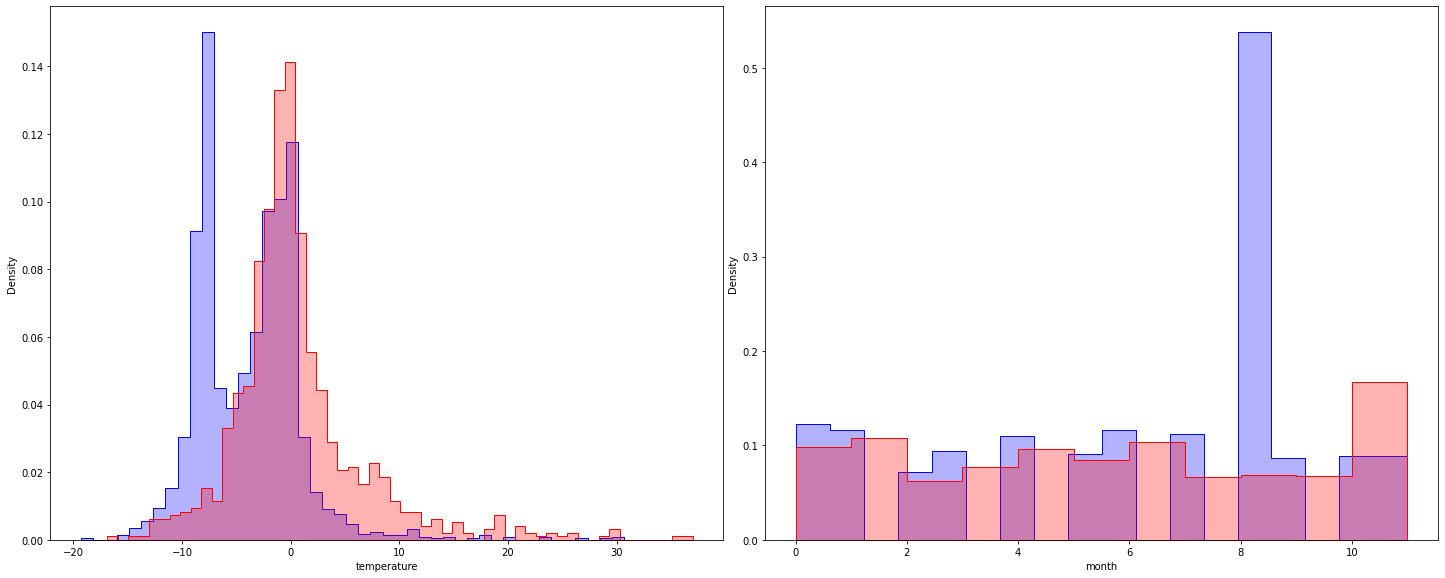

In [268]:
sel_month_temp=["temperature","month","failure"]
data_observation=data_dropped[sel_month_temp]

import seaborn as sns
import matplotlib.pyplot as plt

#data_observation=data_observation[data_observation['month']==8]
#print(data_observation)
X0 = data_observation[data_observation['failure']==0]
X1 = data_observation[data_observation['failure']==1]

print(X0.shape)
print(X1.shape)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,8))
fig.tight_layout()

data_obs = data_observation.iloc[:,0:-1]

for i, ax in zip(range(data_obs.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


In [270]:
selection_categorical=['tread_type', 'tyre_season','month', 'tread_depth', 'wiring_strength', 'tyre_quality']
data_categorical=data_dropped[selection_categorical]
data_categorical.head()

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality
0,0,1,8,0,1,1
1,2,0,11,1,1,0
2,0,0,0,1,1,0
3,1,0,7,3,1,1
4,0,1,2,2,2,0


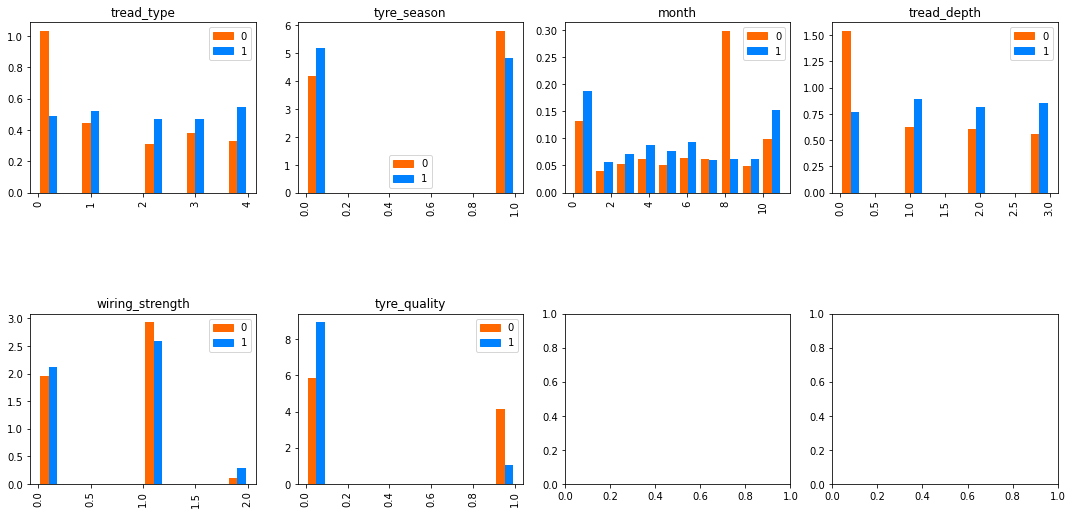

In [271]:
from matplotlib.patches import Rectangle

data_0=data_categorical[data_dropped['failure']==0] # records wih target==0
data_1=data_categorical[data_dropped['failure']==1] # records wih target==1

cmap = plt.get_cmap('jet')
col=[cmap(0.8),cmap(0.25)]
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([data_0[x],data_1[x]],density=True,color=col)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    handles = [Rectangle((0,0),1,1,color=c)for c in col]
    labels= ["0","1"]
    plt.legend(handles, labels)
    i+=1
plt.show()

In [273]:
selection_numerical=['vulc','perc_nat_rubber', 'weather', 'perc_imp', 'temperature',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]
data_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,5.13,0
1,20.704,36,0.30,0.01,-4.52,6.15,0
2,19.156,34,0.30,0.01,-1.08,6.36,0
3,16.802,35,0.19,0.02,7.44,6.62,0
4,17.140,23,0.39,0.01,30.52,6.15,0


(1992, 7)
(1008, 7)


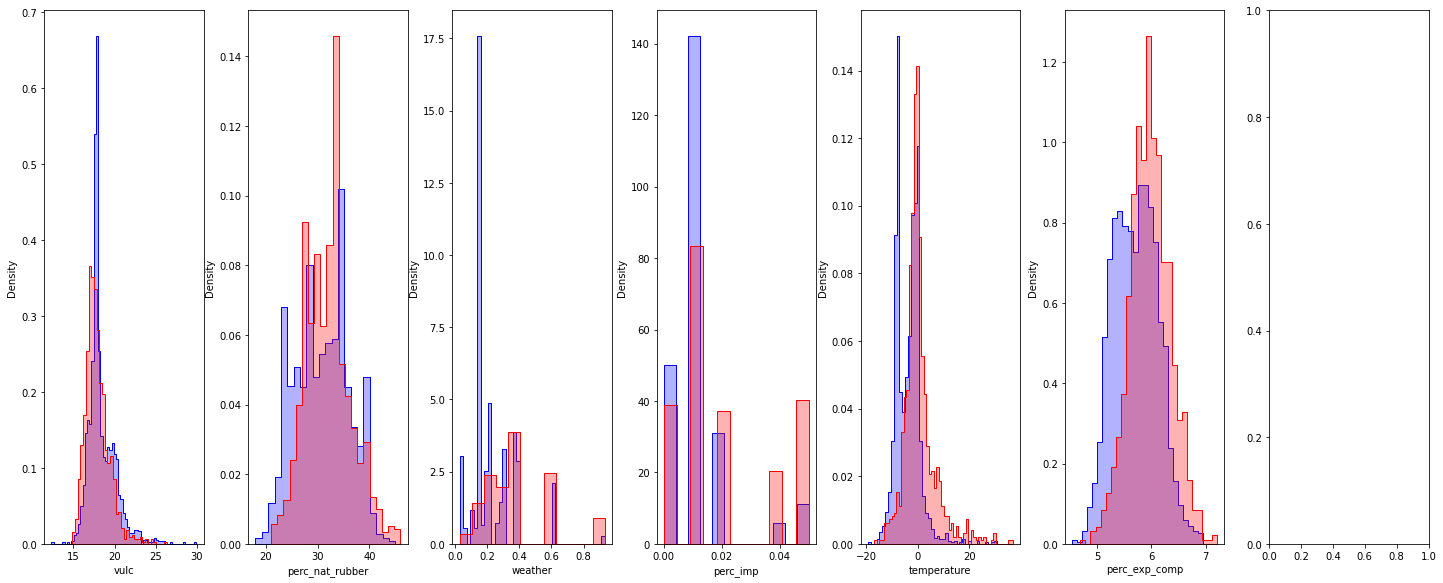

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

X0 = data_numerical[data_numerical['failure']==0]
X1 = data_numerical[data_numerical['failure']==1]
print(X0.shape)
print(X1.shape)
fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(20,8))
fig.tight_layout()

data_num = data_numerical.iloc[:,0:-1]

for i, ax in zip(range(data_num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

In [275]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies=pd.concat([data_dummies,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)
    
data_dummies.head()

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,month_9,tread_depth_0,tread_depth_1,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:>

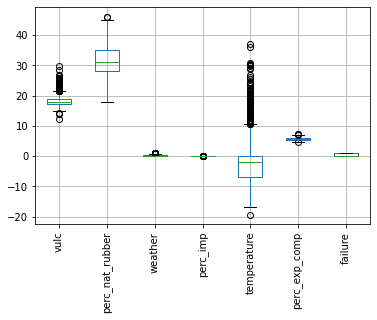

In [276]:
data_numerical.boxplot(rot=90)
# the scale of numerical variables is too different

In [277]:
from sklearn.preprocessing import StandardScaler

independent_variables=data_numerical.iloc[:,:-1] #no target

scaler = StandardScaler().fit(independent_variables) 
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns


<AxesSubplot:>

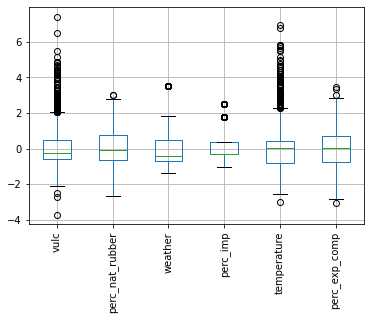

In [278]:
scaled_data.boxplot(rot=90)

In [279]:
#selecting outliers' columns
'''
import numpy as np
col=["vulc","temperature"]
Nsd=scaled_data[col]
K=[]
for i in range(Nsd.shape[0]):
    for j in range(Nsd.shape[1]):
        if Nsd.iloc[i,j]>=5:
            K.append(int(i))
'''            
#scaled_data.drop(index=K,axis=0,inplace=True)
#data_dummies.drop(index=K,axis=0,inplace=True)

'\nimport numpy as np\ncol=["vulc","temperature"]\nNsd=scaled_data[col]\nK=[]\nfor i in range(Nsd.shape[0]):\n    for j in range(Nsd.shape[1]):\n        if Nsd.iloc[i,j]>=5:\n            K.append(int(i))\n'

In [280]:
'''coll=["month_8"]
NDD=data_dummies[coll]
for i in range(NDD.shape[0]):
    for j in range(NDD.shape[1]):
        if NDD.iloc[i,j]==1:
            K.append(int(i))'''

'coll=["month_8"]\nNDD=data_dummies[coll]\nfor i in range(NDD.shape[0]):\n    for j in range(NDD.shape[1]):\n        if NDD.iloc[i,j]==1:\n            K.append(int(i))'

In [281]:
# Create final dataset with all modifications and target variable included
#print(K)

df=pd.concat([data_dummies,scaled_data],axis=1)

#df.drop(K,axis=0,inplace=True)

df['failure']=data_dropped['failure']


df.tail()
vect = df.columns
print(vect)

Index(['tread_type_0', 'tread_type_1', 'tread_type_2', 'tread_type_3',
       'tread_type_4', 'tyre_season_0', 'tyre_season_1', 'month_0', 'month_1',
       'month_10', 'month_11', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'tread_depth_0',
       'tread_depth_1', 'tread_depth_2', 'tread_depth_3', 'wiring_strength_0',
       'wiring_strength_1', 'wiring_strength_2', 'tyre_quality_0',
       'tyre_quality_1', 'vulc', 'perc_nat_rubber', 'weather', 'perc_imp',
       'temperature', 'perc_exp_comp', 'failure'],
      dtype='object')


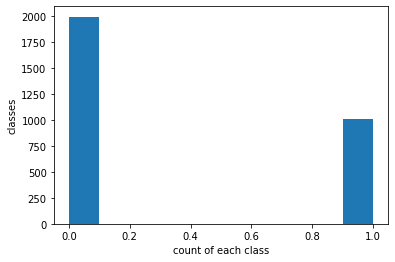

0    1992
1    1008
Name: failure, dtype: int64

In [282]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#Visualize Class Counts
plt.hist(y)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df.failure.value_counts()
# the dataset is umbalanced --> we perform oversampling on the class 1 (oversampling because we have too little rows)


In [283]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size =0.25, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target proportions 
                                                    random_state= 42) #fix random seed for replicability

print(X_train1.shape, X_test1.shape)

(2250, 34) (750, 34)


In [284]:
df_train=pd.concat([X_train1,y_train1],axis=1)
df_test=pd.concat([X_test1,y_test1], axis=1)

print(df_train.shape)

(2250, 35)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,failure
2654,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.450525,0.972207,-0.817311,-0.309506,-0.108239,0.123339,0
2056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.361552,0.771301,-0.322349,-1.023751,0.405495,1.050411,0
1161,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,-0.271807,-0.032324,-0.322349,-1.023751,0.197225,0.391702,0
1699,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.872916,0.369489,-0.322349,-1.023751,0.211109,-0.901320,0
2008,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.834185,0.972207,-0.927303,-1.023751,0.870633,0.025752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.239314,1.976738,0.502588,0.404739,0.391611,0.660065,0
862,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.847699,1.374019,-0.377345,-1.023751,-0.045758,-1.584426,0
2929,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.616726,0.369489,0.502588,0.404739,-0.080470,-1.267270,1
456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.620485,1.574925,-0.377345,-1.023751,0.280533,-0.267008,0


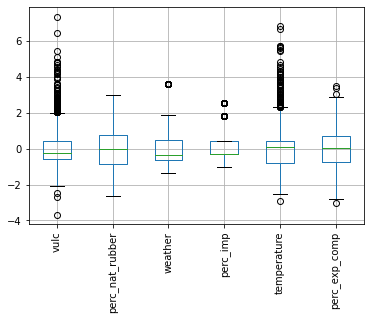

In [285]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

selection_numerical=['vulc','perc_nat_rubber', 'weather', 'perc_imp', 'temperature',
       'perc_exp_comp','failure']
data_numerical_train=df_train[selection_numerical]
selection_categorical=['tread_type_0', 'tread_type_1', 'tread_type_2', 'tread_type_3',
       'tread_type_4', 'tyre_season_0', 'tyre_season_1', 'month_0', 'month_1',
       'month_10', 'month_11', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'tread_depth_0',
       'tread_depth_1', 'tread_depth_2', 'tread_depth_3', 'wiring_strength_0',
       'wiring_strength_1', 'wiring_strength_2', 'tyre_quality_0',
       'tyre_quality_1']
data_categorical_train=df_train[selection_categorical]

independent_variables = data_numerical_train.iloc[:,:-1] #no failure

#print(independent_variables)

scaler = StandardScaler().fit(independent_variables) 

scaled_data_train = pd.DataFrame(scaler.transform(independent_variables))
scaled_data_train.columns = independent_variables.columns

scaled_data_train


scaled_data_train.index = independent_variables.index
scaled_data_train


# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

scaled_data_train.boxplot(rot=90)

df_train_scaled1 = pd.concat([data_categorical_train,scaled_data_train],axis=1)
df_train_scaled1.head()

df_train_scaled1['failure'] = df_train['failure']

df_train_scaled1
#df_train_scaled.isnull().sum()
#df_train_scaled1[df_train_scaled1.failure==0] 706 insuccessi e 1394 successi


from pickle import load

data_numerical_test = df_test[selection_numerical]
data_numerical_test

#print(data_numerical_test.head())
independent_variables = data_numerical_test.iloc[:,:-1]

# load the scaler
scaler = load(open('scaler.pkl', 'rb'))

scaled_data_test = pd.DataFrame(scaler.transform(independent_variables))
scaled_data_test.columns = independent_variables.columns

scaled_data_test



data_categorical_test = df_test[selection_categorical]
#print((data_categorical_test.axes[0]))

scaled_data_test.index = independent_variables.index
scaled_data_test


df_test_scaled = pd.concat([data_categorical_test,scaled_data_test],axis=1)

df_test_scaled['failure'] = df_test['failure']
df_test_scaled

In [288]:
#resample del train set
from sklearn.utils import resample

df_majority_train = df_train[df_train.failure==0]
df_minority_train = df_train[df_train.failure==1] 
print(df_majority_train.shape[0],df_minority_train.shape[0])

df_minority_oversampled_train = resample(df_minority_train, 
                                   replace=True,
                                   n_samples=756,     
                                   random_state=42)  

df_oversampled_train = pd.concat([df_minority_oversampled_train, df_majority_train])

df_oversampled_train.failure.value_counts()


1494 756


0    1494
1     756
Name: failure, dtype: int64

In [289]:
from sklearn.utils import shuffle
df_oversampled_train = shuffle(df_oversampled_train)


In [ ]:
#resample del test set
#from sklearn.utils import resample

#df_majority_test = df_test[df_test.failure==0]
#df_minority_test = df_test[df_test.failure==1] 
 
#df_minority_oversampled_test = resample(df_minority_test, 
 #                                  replace=True,
  #                                 n_samples=498,     
   #                                random_state=123)  

#df_oversampled_test = pd.concat([df_minority_oversampled_test, df_majority_test])

#df_oversampled_test.failure.value_counts()

In [290]:
#Separate X and y on the new DataFrame
X_train=df_oversampled_train.iloc[:,0:-1]
y_train=df_oversampled_train.iloc[:,-1]

X_test = X_test1
y_test = y_test1

print(X_train.shape,y_train.shape)


(2250, 34) (2250,)


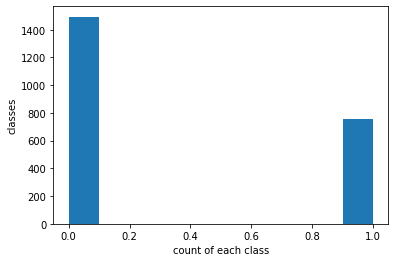

0    1494
1     756
Name: failure, dtype: int64

In [291]:
plt.hist(y_train)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()
df_oversampled_train.failure.value_counts()

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [293]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [294]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)


**TREE**

In [297]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [5],
              'min_samples_split': [10,14,16,18],
              'min_samples_leaf': [2,3,4,5]}

hyperp_search(classifier,parameters)

f1_train: 0.589032 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}
f1         train 0.629   test 0.611
precision  train 0.654   test 0.624

[[407  91]
 [101 151]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       498
           1       0.62      0.60      0.61       252

    accuracy                           0.74       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.74      0.74      0.74       750



In [ ]:
model_Tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 15, min_samples_leaf= 5, min_samples_split= 5)


In [ ]:
#curva ROC
fpr1,tpr1=roc(model_Tree,X_train,y_train,X_test,y_test)


**KNN**

In [305]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(40,200,10)}

hyperp_search(classifier,parameters)

f1_train: 0.508224 using {'n_neighbors': 40}
f1         train 0.552   test 0.532
precision  train 0.698   test 0.673

[[444  54]
 [141 111]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       498
           1       0.67      0.44      0.53       252

    accuracy                           0.74       750
   macro avg       0.72      0.67      0.68       750
weighted avg       0.73      0.74      0.72       750



In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=30)

#curva ROC
fpr2,tpr2=roc(model_knn,X_train,y_train,X_test,y_test)

**Naive Bayes**

In [306]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)

y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_train: ", f1_score(y_train, y_pred_train))


print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


f1_train:  0.5913757700205339
f1_test:  0.5838509316770186
[[294 204]
 [ 64 188]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       498
           1       0.48      0.75      0.58       252

    accuracy                           0.64       750
   macro avg       0.65      0.67      0.64       750
weighted avg       0.71      0.64      0.65       750



In [ ]:

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

**LOGISTIC REGRESSION**

In [307]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "penalty":['l2','none'], "max_iter":[100,1000,2000] }


hyperp_search(classifier,parameters)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

f1_train: 0.543513 using {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
f1         train 0.555   test 0.596
precision  train 0.664   test 0.691

[[439  59]
 [120 132]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       498
           1       0.69      0.52      0.60       252

    accuracy                           0.76       750
   macro avg       0.74      0.70      0.71       750
weighted avg       0.75      0.76      0.75       750



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


In [ ]:
model_Log = LogisticRegression(C=0.1, max_iter=500)

fpr4,tpr4=roc(model_Log,X_train,y_train,X_test,y_test)

**SVM**

In [313]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.01, 0.05, 0.1, 0.5]}

hyperp_search(classifier,parameters)

f1_train: 0.524640 using {'C': 0.1, 'kernel': 'linear'}
f1         train 0.550   test 0.574
precision  train 0.711   test 0.750

[[459  39]
 [135 117]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       498
           1       0.75      0.46      0.57       252

    accuracy                           0.77       750
   macro avg       0.76      0.69      0.71       750
weighted avg       0.77      0.77      0.75       750



In [ ]:
model = SVC(C=1, kernel='rbf',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

**NEURAL NETWORK**

In [316]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5,3,2),(5,3),(10, 5)],  "max_iter": [500,1000,2000], "alpha": [0.1,0.9]}

hyperp_search(classifier,parameters)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

f1_train: 0.614197 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1         train 0.782   test 0.510
precision  train 0.792   test 0.553

[[402  96]
 [133 119]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       498
           1       0.55      0.47      0.51       252

    accuracy                           0.69       750
   macro avg       0.65      0.64      0.64       750
weighted avg       0.68      0.69      0.69       750



In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.01, max_iter=50000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

**RANDOM FOREST**

In [333]:
from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     np.arange(3,8,1),
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(3,5,1), 
              'min_samples_split': np.arange(18,22,1),
              'min_samples_leaf' : np.arange(2,8,1),
             # 'class_weight' : ["balanced"]
             };

hyperp_search(classifier,parameters)


f1_train: 0.641668 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 7}
f1         train 0.645   test 0.598
precision  train 0.510   test 0.458

[[241 257]
 [ 35 217]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       498
           1       0.46      0.86      0.60       252

    accuracy                           0.61       750
   macro avg       0.67      0.67      0.61       750
weighted avg       0.73      0.61      0.61       750



In [ ]:
model_RandomForest=RandomForestClassifier()

fpr7,tpr7=roc(model_RandomForest,X_train,y_train,X_test,y_test)

**CHOICE OF THE MODEL**

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**PREDICTIONS**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()